In [4]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from __future__ import division

### Constants

In [5]:
GLUCOSE_GROWTH_CURVE = [[0,3,4,5,6,8,24,48,168,336],np.array([0.00267,0.01333,0.02567,0.06167,0.13567,0.19933,0.19500,0.17667,0.15233,0.14567])]
GLUCOSE_GROWTH_CURVE_STDDEV = np.array([0.00058,0.00208,0.00306,0.00058,0.01210,0.00321,0.00100,0.00306,0.00153,0.00208])
TIMES = [3,4,5,6,8,24,48,168,336]


### Import peptide table from file

In [6]:
# load peptide sets
all_pept = pd.read_table("data/all_pept.tsv")
modified_pepts = pd.read_pickle("data/modified_peptides.pck")

all_pept_modified_uniqpept = pd.read_pickle("data/all_pept_modified_uniqpept.pck")
all_pept_total_uniqpept = pd.read_pickle("data/all_pept_total_uniqpept.pck")

all_pept_modified_prot = pd.read_pickle("data/all_pept_modified_proteins.pck")
all_pept_total_prot = pd.read_pickle("data/all_pept_total_proteins.pck")

all_pept_fdr1 = pd.read_pickle("data/all_pept_fdr1.pck")
modified_pept_fdr1 = pd.read_pickle("data/modified_pept_fdr1.pck")

all_pept_fdr1_modified_uniqpept = pd.read_pickle("data/all_pept_fdr1_modified_uniqpept.pck")
all_pept_fdr1_total_uniqpept = pd.read_pickle("data/all_pept_fdr1_total_uniqpept.pck")

all_pept_fdr1_modified_prot = pd.read_pickle("data/all_pept_fdr1_modified_proteins.pck")
all_pept_fdr1_total_prot = pd.read_pickle("data/all_pept_fdr1_total_proteins.pck")

all_pept_fdr5 = pd.read_pickle("data/all_pept_fdr5.pck")
modified_pept_fdr5 = pd.read_pickle("data/modified_pept_fdr5.pck")

all_pept_fdr5_modified_uniqpept = pd.read_pickle("data/all_pept_fdr5_modified_uniqpept.pck")
all_pept_fdr5_total_uniqpept = pd.read_pickle("data/all_pept_fdr5_total_uniqpept.pck")

all_pept_fdr5_modified_prot = pd.read_pickle("data/all_pept_fdr5_modified_proteins.pck")
all_pept_fdr5_total_prot = pd.read_pickle("data/all_pept_fdr5_total_proteins.pck")

In [1]:
def plot_count_x_time_biorep(subset_counts,total_counts,times=TIMES):
    """
    Make a line plot of fractional counts across timepoints
    """
    st = ['k-','k--','k:']
    print total_counts.head()
    percentages = (subset_counts / total_counts)
    print percentages.head()
    plt.ylim(0,1.1*percentages.max())
    for x in (1,2,3):
        sl = percentages[x]
        plt.plot(times,sl,st[x-1],label="Biol. Repl. %d" % (x,))
    plt.ylim(0,1)
    ax = plt.gca()
    format_plot(ax)
    ax.set_xscale('log',basex=2)
    ax.set_xticks(times,minor=False)
    ax.set_xticks([],minor=True)
    ax.set_xticklabels(times)
        
        
def format_plot(axis,ticklabelfontsize=18,labelfontsize=24):
    """
    Fix formatting for better readability
    """
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.tick_params(top='off',right='off',which='both')
    axis.set_yticklabels(axis.get_yticks(),fontsize=ticklabelfontsize)
    axis.set_xticklabels(axis.get_xticks(),fontsize=ticklabelfontsize)
    axis.set_ylabel(axis.get_ylabel,fontsize=labelfontsize)
    axis.set_xlabel(axis.get_xlabel,fontsize=labelfontsize)

NameError: name 'TIMES' is not defined

# Figure 1.A

## Total Peptides

### Plot all modified PEPTIDES across time points, separate plots for each biological replicate

In [8]:
all_pept_modified_sum_x_time = all_pept_modified_uniqpept.sum(axis=0)
all_pept_total_sum_x_time = all_pept_total_uniqpept.sum(axis=0)
all_pept_fdr1_modified_sum_x_time = all_pept_fdr1_modified_uniqpept.sum(axis=0)
all_pept_fdr1_total_sum_x_time = all_pept_fdr1_total_uniqpept.sum(axis=0)
all_pept_fdr5_modified_sum_x_time = all_pept_fdr5_modified_uniqpept.sum(axis=0)
all_pept_fdr5_total_sum_x_time = all_pept_fdr5_total_uniqpept.sum(axis=0)

BiolRep  Time
1        3       54137
         4       57263
         5       56071
         6       57183
         8       58585
dtype: float64
BiolRep  Time
1        3       0.111569
         4       0.112656
         5       0.120044
         6       0.139360
         8       0.140121
dtype: float64


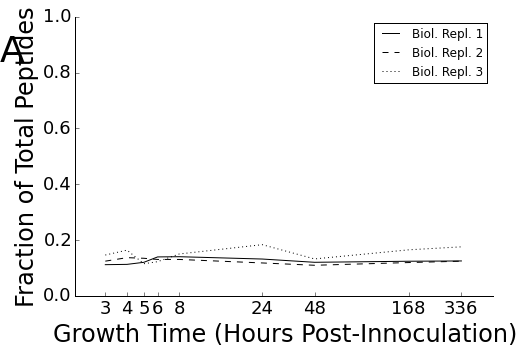

In [9]:
# Inline output looks odd, but formats correctly in .pdf
plt.gcf().set_figheight(5)
plt.gcf().set_figwidth(7.5)
plot_count_x_time_biorep(all_pept_fdr1_modified_sum_x_time,all_pept_fdr1_total_sum_x_time)
plt.annotate('A',xy=(1,0),xytext=(0,.9),xycoords='figure fraction',textcoords='figure fraction',fontsize=36,horizontalalignment='left',verticalalignment='top')
ax = plt.gca()
ax.set_xlabel("Growth Time (Hours Post-Innoculation)")
ax.set_ylabel("Fraction of Total Peptides")
plt.legend(loc='upper right')
plt.savefig('figures/all_pept_fdr1_modified_sum_x_time.pdf',format='pdf',bbox_inches='tight',pad_inches=.75)

# Figure 1.B

## Unique Peptides

In [10]:
all_pept_modified_uniqpept_sum_x_time = all_pept_modified_uniqpept[all_pept_modified_uniqpept > 0].count(axis=0)
all_pept_total_uniqpept_sum_x_time = all_pept_total_uniqpept[all_pept_total_uniqpept > 0].count(axis=0)
all_pept_fdr1_uniqpept_modified_sum_x_time = all_pept_fdr1_modified_uniqpept[all_pept_fdr1_modified_uniqpept > 0].count(axis=0)
all_pept_fdr1_uniqpept_total_sum_x_time = all_pept_fdr1_total_uniqpept[all_pept_fdr1_total_uniqpept > 0].count(axis=0)
all_pept_fdr5_uniqpept_modified_sum_x_time = all_pept_fdr5_modified_uniqpept[all_pept_fdr5_modified_uniqpept > 0].count(axis=0)
all_pept_fdr5_uniqpept_total_sum_x_time = all_pept_fdr5_total_uniqpept[all_pept_fdr5_total_uniqpept > 0].count(axis=0)

BiolRep  Time
1        3       7862
         4       7860
         5       7281
         6       7092
         8       7200
dtype: int64
BiolRep  Time
1        3       0.230603
         4       0.245420
         5       0.235957
         6       0.261844
         8       0.245972
dtype: float64


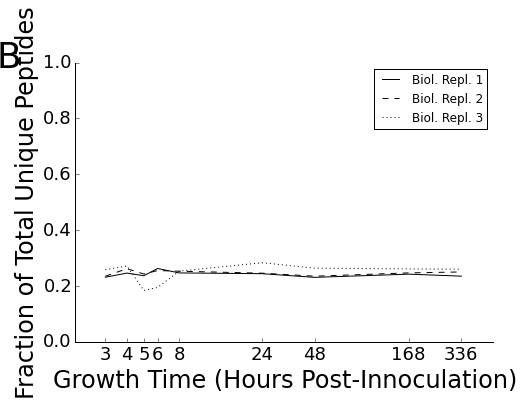

In [11]:
plt.gcf().set_figheight(5)
plt.gcf().set_figwidth(7.5)
#plt.subplot(121)
plot_count_x_time_biorep(all_pept_fdr1_uniqpept_modified_sum_x_time,all_pept_fdr1_uniqpept_total_sum_x_time)
plt.annotate('B',xy=(1,0),xytext=(0,.9),xycoords='figure fraction',textcoords='figure fraction',fontsize=36,horizontalalignment='left',verticalalignment='top')
ax = plt.gca()
ax.set_xlabel("Growth Time (Hours Post-Innoculation)")
ax.set_ylabel("Fraction of Total Unique Peptides")
plt.legend(loc='upper right')
plt.savefig('figures/all_pept_fdr1_modified_uniqpept_sum_x_time.pdf',format='pdf',bbox_inches='tight',pad_inches=.75)

# Figure 1.C

## Proteins

In [12]:
all_pept_modified_proteins_sum_x_time = all_pept_modified_prot[all_pept_modified_prot > 0].count(axis=0)
all_pept_total_proteins_sum_x_time = all_pept_total_prot[all_pept_total_prot > 0].count(axis=0)
all_pept_fdr1_modified_proteins_sum_x_time = all_pept_fdr1_modified_prot[all_pept_fdr1_modified_prot > 0].count(axis=0)
all_pept_fdr1_total_proteins_sum_x_time = all_pept_fdr1_total_prot[all_pept_fdr1_total_prot > 0].count(axis=0)
all_pept_fdr5_modified_proteins_sum_x_time = all_pept_fdr5_modified_prot[all_pept_fdr5_modified_prot > 0].count(axis=0)
all_pept_fdr5_total_proteins_sum_x_time = all_pept_fdr5_total_prot[all_pept_fdr5_total_prot > 0].count(axis=0)

BiolRep  Time
1        3       1496
         4       1469
         5       1429
         6       1440
         8       1467
dtype: int64
BiolRep  Time
1        3       0.538770
         4       0.536419
         5       0.534640
         6       0.535417
         8       0.520109
dtype: float64


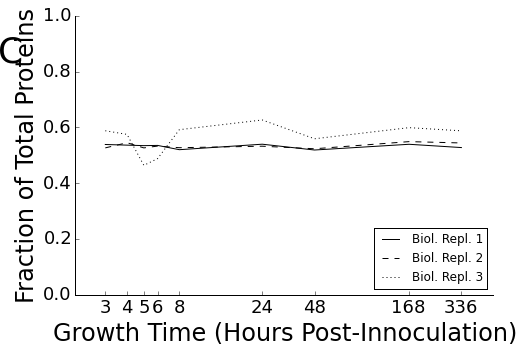

In [13]:
plt.gcf().set_figheight(5)
plt.gcf().set_figwidth(7.5)
plot_count_x_time_biorep(all_pept_fdr1_modified_proteins_sum_x_time,all_pept_fdr1_total_proteins_sum_x_time)
plt.annotate('C',xy=(1,0),xytext=(0,.9),xycoords='figure fraction',textcoords='figure fraction',fontsize=36,horizontalalignment='left',verticalalignment='top')

ax = plt.gca()
ax.set_xlabel("Growth Time (Hours Post-Innoculation)")
ax.set_ylabel("Fraction of Total Proteins")
plt.legend(loc='lower right')
plt.savefig('figures/all_pept_fdr1_modified_proteins_sum_x_time.pdf',format='pdf',bbox_inches='tight',pad_inches=.75)